In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the data from the file
data = pd.read_csv("Kc_house_data.csv")

In [2]:
# General information about the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
# The first 5 rows from the data
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


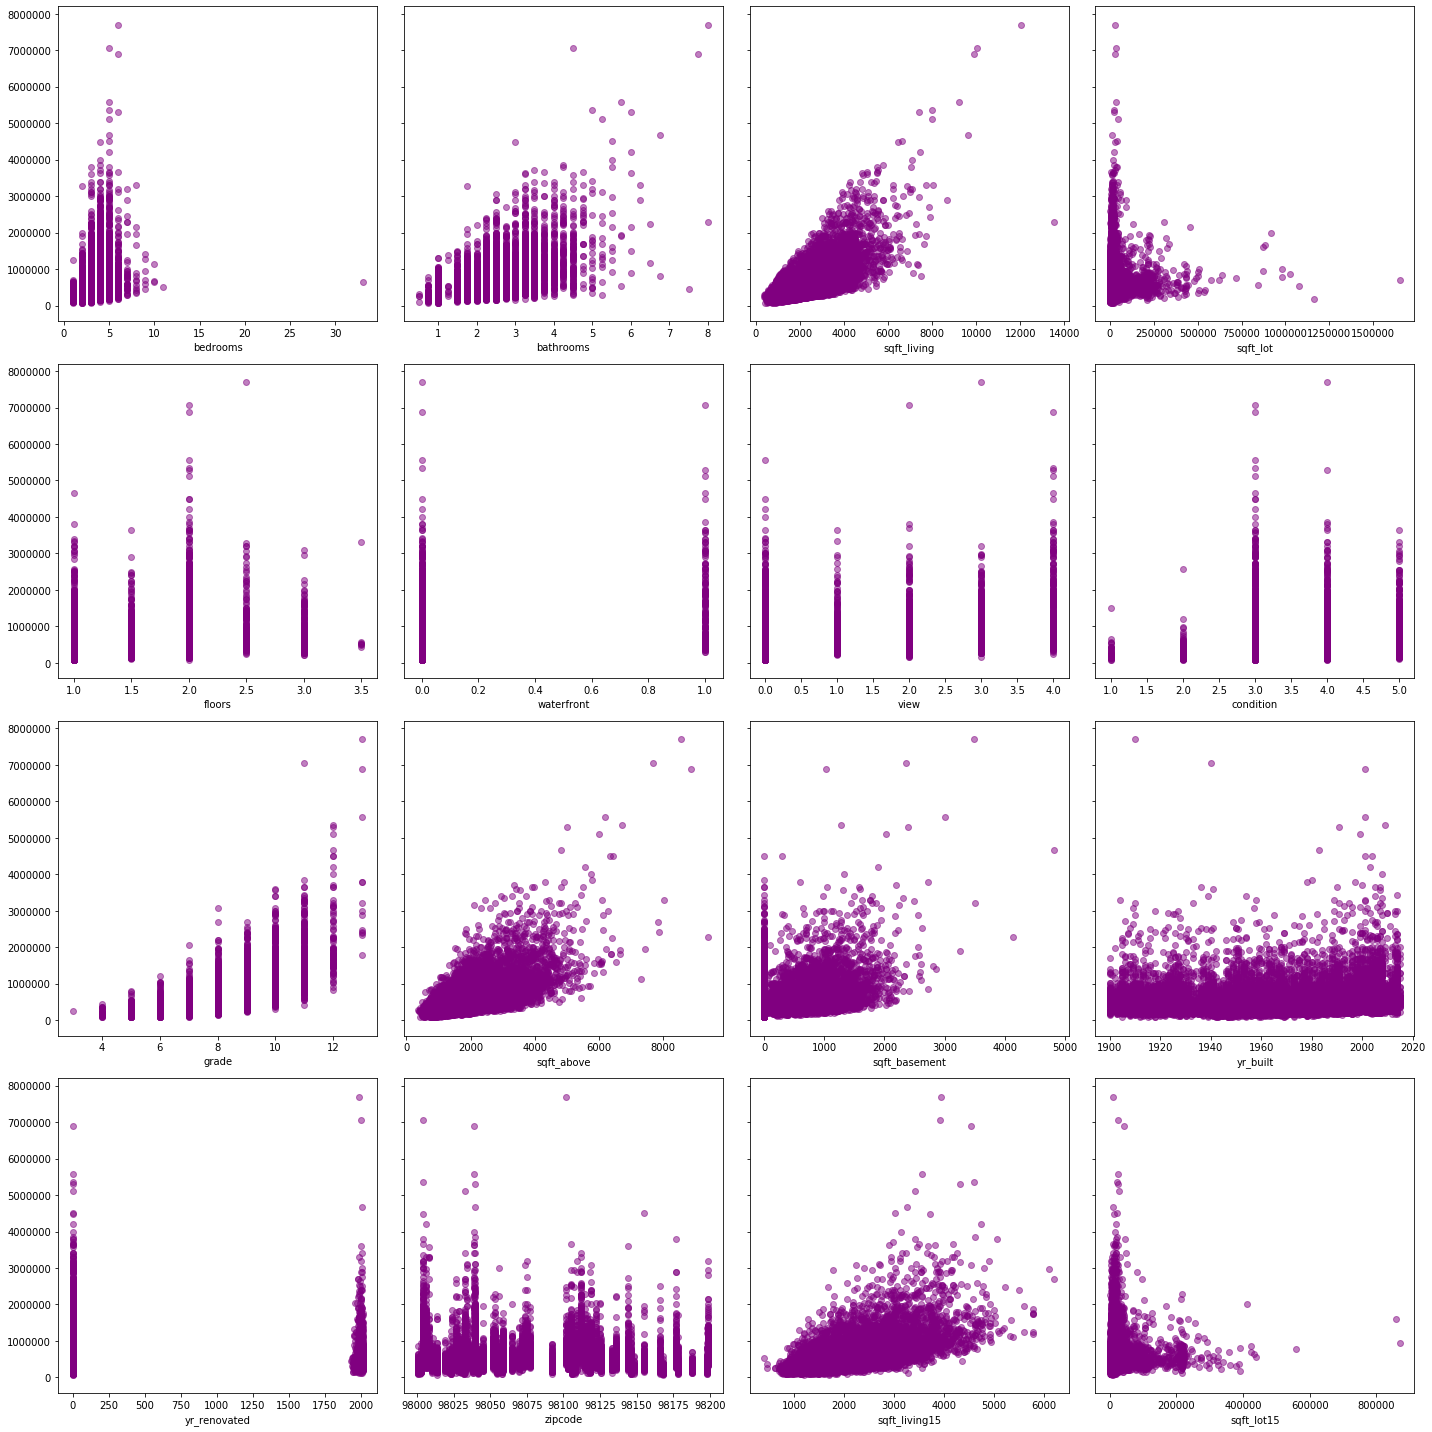

In [4]:
# Getting the feature names from the data
features = data.columns
features = list(features)

# Eliminating irrelevant features
features.remove('id')
features.remove('price')
features.remove('date')
features.remove('lat')
features.remove('long')

# Getting the price of each sample of the data
price = data.price

# Number of rows in the data
total_samples = len(price)

# Plotting each feature vs the price
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20,20), sharey = True)
index = 0
for i in range(0, 4):
    for j in range(0, 4):
        info = np.array(data[features[index]])
        axes[i][j].scatter(info, price, color='purple', alpha = 0.5)
        axes[i][j].set_xlabel(features[index])
        index += 1

plt.tight_layout()
plt.show()

In [5]:
# Defining the cost function (squared error)
def squared_error(predicted_Y, actual_Y):
    return (1 / (2 * len(predicted_Y))) * np.sum(np.power((predicted_Y - actual_Y), 2))

In [6]:
# Linear regression uses the line equation in order to make predictions
def make_prediction(x, w):
    aux = np.array([1, x])
    return(aux @ w)

In [7]:
# Gradient Descent
def gradient_descent(X, Y, pred_Y, W, m, alpha):
    
    # For w0
    temp0 = W[0] - (alpha * (1 / m) * np.sum(pred_Y - Y))

    # For w1
    temp1 = W[1] - (alpha * (1 / m) * np.sum((pred_Y - Y) * X[0]))

    W[0] = temp0
    W[1] = temp1

In [8]:
# Initializing random weigths
W = np.random.rand(2) * 10

# Using bedrooms to make the predictions
bedrooms = data['bedrooms']

# Making the first predictions with the random generated weights
predictions = np.zeros(total_samples)

for i in range(0, total_samples):
    predictions[i] = make_prediction(bedrooms[i], W)

In [9]:
# Getting the first cost
first_cost = squared_error(predictions, price)
first_cost

213425278732.11993

In [10]:
# Alpha: learning rate
alpha = 0.0001

# Number of times we are going to repeat the gradient descent
iterations = 1000

for i in range(0, iterations):
    gradient_descent(bedrooms, price, predictions, W, total_samples, alpha)

In [11]:
# Making new predictions with the improved weights
predictions = np.zeros(total_samples)

for i in range(0, total_samples):
    predictions[i] = make_prediction(bedrooms[i], W)

In [12]:
# Getting the new cost
second_cost = squared_error(predictions, price)
second_cost

63545654433.52524

In [13]:
print("First Cost:  ", first_cost)
print("Second Cost: ", second_cost)
print("Improvement; ", first_cost - second_cost)
print("Weigths: ", W)

First Cost:   213425278732.11993
Second Cost:  63545654433.52524
Improvement;  149879624298.5947
Weigths:  [ 54034.51647681 162086.8530875 ]
